In [1]:
#to solve the useless problem of nltk
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, SimpleRNN, LSTM, GRU, Input, Embedding

In [3]:
df = pd.read_csv('/kaggle/input/dl-lab-week7/Train.csv')
testdf = pd.read_csv('/kaggle/input/dl-lab-week7/Test.csv')
valdf = pd.read_csv('/kaggle/input/dl-lab-week7/Valid.csv')

In [4]:
import string

def clean_text(text):
    text = text.lower()
    text = text.replace("https://",' ').replace("http://",' ').replace("www.",' ')
    text = text.replace("@",' ').replace("#",' ')
    for i in string.punctuation:
        text = text.replace(i,'')
    text = ''.join([w for w in text if not w.isdigit()])
    text = ' '.join(text.split())
    return text

df['cleaned_text'] = df['text'].apply(clean_text)
testdf['cleaned_text'] = testdf['text'].apply(clean_text)
valdf['cleaned_text'] = valdf['text'].apply(clean_text)

# Tokenization

In [5]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

df['tokenized'] = df['cleaned_text'].apply(tokenize)
testdf['tokenized'] = testdf['cleaned_text'].apply(tokenize)
valdf['tokenized'] = valdf['cleaned_text'].apply(tokenize)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# stopwords Remove & Lemmatization

In [6]:
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

stopwords.add('b')
stopwords.add('br')

def stopwordandlemmatize(text):
    words = [word for word in text if word not in stopwords]
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in words]
    return lemmatized_tokens

df['lemmatized'] = df['tokenized'].apply(stopwordandlemmatize)
testdf['lemmatized'] = testdf['tokenized'].apply(stopwordandlemmatize)
valdf['lemmatized'] = valdf['tokenized'].apply(stopwordandlemmatize)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


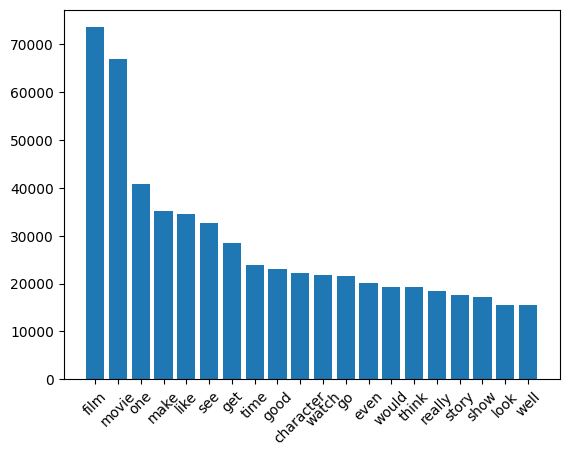

In [18]:
word_list = np.concatenate(df['lemmatized'])

from collections import Counter

word_count = Counter(word_list)
most_common = word_count.most_common(20)

words = [word[0] for word in most_common]
count = [word[1] for word in most_common]

plt.bar(words,count)
plt.xticks(rotation=45)
plt.show()

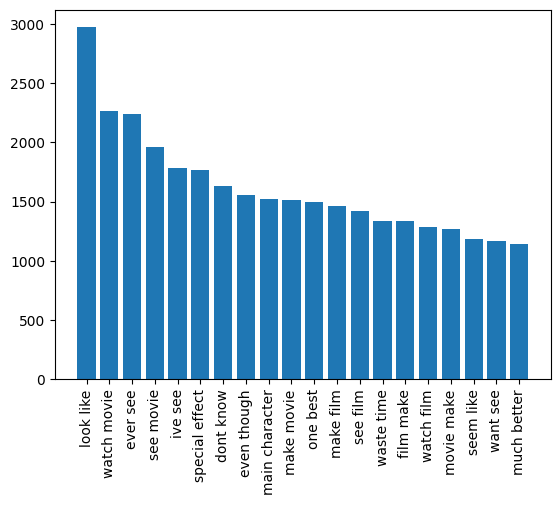

In [23]:
from nltk import bigrams

bigrams = bigrams(word_list)
bigram_word_count = Counter(bigrams)
most_common_bigram = bigram_word_count.most_common(20)

bigramwords = [word[0] for word in most_common_bigram]
bigramcount = [word[1] for word in most_common_bigram]

plt.bar([f"{w[0]} {w[1]}" for w in bigramwords],bigramcount)
plt.xticks(rotation=90)
plt.show()

# Positive Negative

In [49]:
dfposi = df.loc[df['label']==1,'lemmatized']
dfnegi = df.loc[df['label']==0,'lemmatized']

In [55]:
posilist = np.concatenate(dfposi.tolist())
negilist = np.concatenate(dfnegi.tolist())

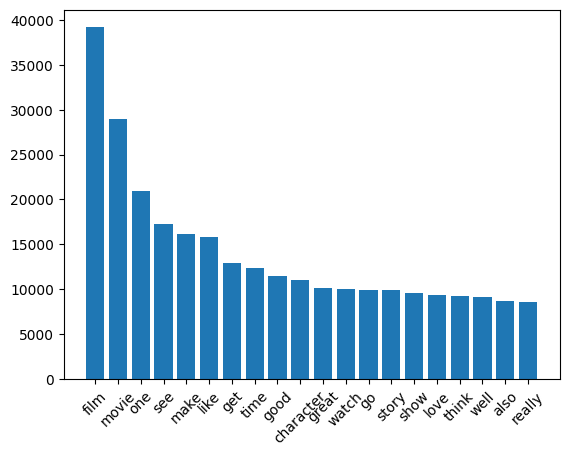

In [56]:
from collections import Counter

wordcount = Counter(posilist)
most_common = wordcount.most_common(20)

words=[word[0] for word in most_common]
count=[word[1] for word in most_common]

plt.bar(words,count)
plt.xticks(rotation=45)
plt.show()

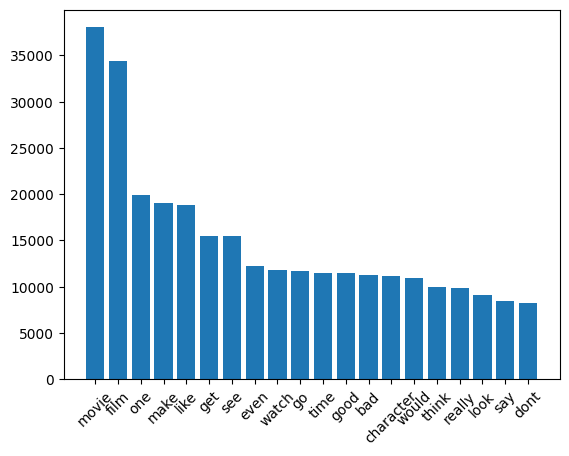

In [57]:
from collections import Counter

wordcount = Counter(negilist)
most_common = wordcount.most_common(20)

words=[word[0] for word in most_common]
count=[word[1] for word in most_common]

plt.bar(words,count)
plt.xticks(rotation=45)
plt.show()

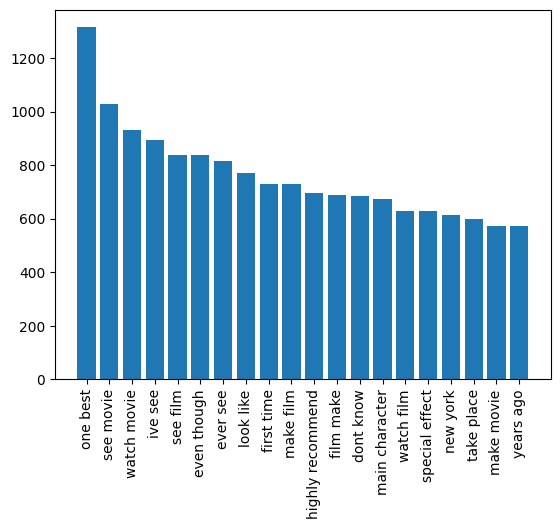

In [59]:
from nltk import bigrams

bigrams = bigrams(posilist)
wordcount = Counter(bigrams)
most_common = wordcount.most_common(20)

words= [word[0] for word in most_common]
count= [word[1] for word in most_common]

plt.bar([f"{w[0]} {w[1]}" for w in words], count)
plt.xticks(rotation=90)
plt.show()

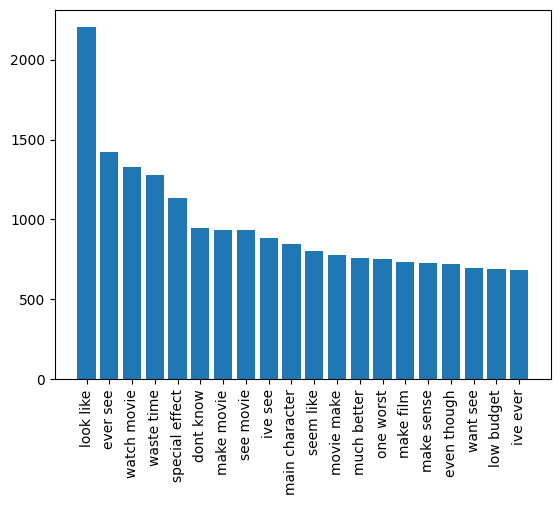

In [60]:
from nltk import bigrams

bigrams = bigrams(negilist)
wordcount = Counter(bigrams)
most_common = wordcount.most_common(20)

words= [word[0] for word in most_common]
count= [word[1] for word in most_common]

plt.bar([f"{w[0]} {w[1]}" for w in words], count)
plt.xticks(rotation=90)
plt.show()

In [64]:
def fintext(text):
    return ' '.join(word for word in text)

df['final_text'] = df['lemmatized'].apply(fintext)

In [72]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab = 10000
seq_len = 200
output_dim = 128

tokenizer = Tokenizer()

ttokenizer.fit_on_texts(df['final_text'])
text_seq = tokenizer.texts_to_sequences(df['final_text'])
x_train = pad_sequences(text_seq,maxlen=seq_len,padding='post',truncating='post')
y_train = df['label']

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [79]:
model = Sequential([
    Input(shape = (seq_len,),name = 'input'),
    Embedding(input_dim=max_vocab, output_dim=output_dim, input_length=seq_len),
    Bidirectional(SimpleRNN(64, return_sequences=True)),
    Bidirectional(SimpleRNN(64, return_sequences=True)),
    Bidirectional(SimpleRNN(64, return_sequences=True)),
    Bidirectional(SimpleRNN(64)),
    Dense(1,activation='sigmoid')
])

In [80]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_16                │ (None, 200, 128)       │        24,704 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_17                │ (None, 200, 128)       │        24,704 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_18                │ (None, 200, 128)       │        24,704 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_19                │ (None, 128)            │        24,704 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [84]:
testdf['final_text'] = testdf['lemmatized'].apply(fintext)
valdf['final_text'] = valdf['lemmatized'].apply(fintext)

test_sequences = tokenizer.texts_to_sequences(testdf['final_text'])
x_test = pad_sequences(test_sequences,maxlen=seq_len,padding = 'post',truncating = 'post')
y_test = testdf['label']

valid_sequences = tokenizer.texts_to_sequences(valdf['final_text'])
x_val = pad_sequences(valid_sequences,maxlen = seq_len,padding = 'post',truncating = 'post')
y_val = valdf['label']

In [85]:
model.fit(x_train,y_train, epochs=3, validation_data=(x_val,y_val))

Epoch 1/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 150s 120ms/step - acc: 0.7673 - loss: 0.4959 - val_acc: 0.7586 - val_loss: 0.5408
Epoch 2/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 147s 117ms/step - acc: 0.7952 - loss: 0.4522 - val_acc: 0.7644 - val_loss: 0.5252
Epoch 3/3
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 147s 117ms/step - acc: 0.8138 - loss: 0.4311 - val_acc: 0.7926 - val_loss: 0.4561


In [96]:
y_pred = (model.predict(x_test)>0.5).astype('int32')

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step


In [97]:
y_pred

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2495
           1       0.83      0.75      0.79      2505

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



<Axes: >

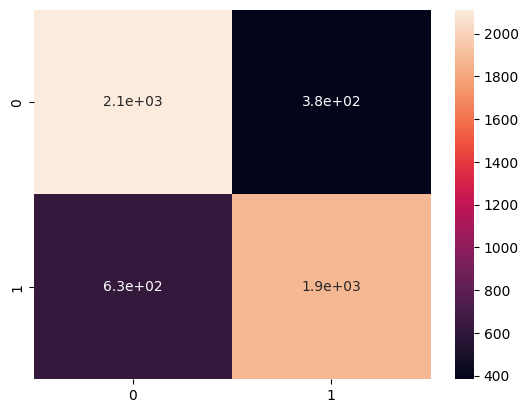

In [100]:
from sklearn.metrics import classification_report as cr, confusion_matrix as cm

print(cr(y_test,y_pred))
sns.heatmap(cm(y_test,y_pred),annot=True)

In [ ]:
from nltk.corpus import stopwords
stopwords

In [ ]:
import pandas as pd
import string

# Example DataFrame
df = pd.DataFrame({'text': ["Sample text with a URL https://example.com and some #hashtags.", 
                            "Another example with a mention @user and [brackets]."]})

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Replace newlines and tabs with space
    text = text.replace('\n', ' ').replace('\t', ' ')
    
    # Remove URLs
    text = text.replace("https://", " ").replace("http://", " ").replace("www.", " ")
    
    # Remove mentions and hashtags (simple method)
    for char in ['@', '#']:
        text = text.replace(char, ' ')
    
    # Remove brackets
    text = text.replace('[', ' ').replace(']', ' ').replace('<', ' ').replace('>', ' ')
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove digits
    text = ''.join([i for i in text if not i.isdigit()])
    
    # Remove extra spaces
    text = ' '.join(text.split())
    
    return text

df['text'] = df['text'].apply(preprocess_text)
